# Chapter 1

## Log-Mel Spectrograms

Log-mel spectrograms are mid-level audio features that are used for training deep learning models. To understand log-mel spectrograms, we will quickly brush through some fundamentals which are extremely necessary.

Generally speaking, <b>a signal</b> represents the variation in a quantity with time. So, in essence, an audio signal, represents the variation in air pressure with time. This signal is typically continuous; hence, to store it, we need to perform <b>sampling</b>. When sampling, we measure or read the air pressure values as fast as we can. The higher the sampling rate, the more accurate our representation of the signal. The sampling rate typically varies but a common value is 44100 Hz where 1 Hz refers to a sample per second. Once we sample this signal, we now have a digital representation we can modify. Let's look at an example below.

In [1]:
# Import necessary libraries
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

# Read the audio file using librosa
audio_signal, sample_rate = librosa.load('audio/happy-know.flac')
ipd.Audio(audio_signal, rate=sample_rate)

The above audio is me playing the popular kid song, ["If you are happy and you know it, clap your hands"](https://www.youtube.com/watch?v=M6LoRZsHMSs) on the piano. However, since I grew up in the church as a kid, we sung it as, "If you are happy and you know it, say Amen!" Amennnnn!!!!! :-)<br>

That being said, let's see the variation in pressure in the signal!

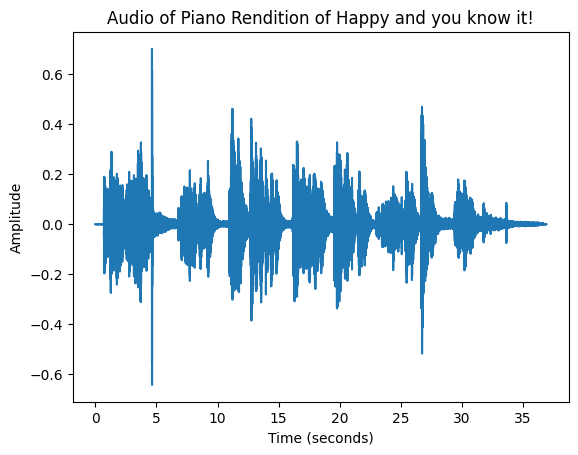

In [2]:
plt.plot(np.arange(len(audio_signal))/sample_rate, audio_signal)
plt.title('Audio of Piano Rendition of Happy and you know it!')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude');

### Fourier Analysis

Now, how do we manipulate the above signal? How do we remove the high and low frequiences? How do we change how it sounds? To do this, we need the power of the <b>fourier transform</b>. To understand fourier transform, you need to understand vectors. But to explain what fourier analysis is all about, we can simply say it is a tool that breaks down a signal into its individual frequencies. Essentially, we move from the time domain to the frequency domain. Are you confused? Well, fear not. I will explain.
<br>

Image Source: [tikz](https://tikz.net/fourier_series/)
<img src="./images/fourier-transform.png" alt="drawing" width="700"/>

Now, what is the logic behind this process? Remember <i><b>vectors?</b></i> Well, a vector can be represented as a linear combination of its basis vectors. So, for the image below, let $v = 2i - 5j$<br>

where $j$ is the vector $\begin{bmatrix}0\\1\end{bmatrix}$ and $i$ is the vector $\begin{bmatrix}1\\0\end{bmatrix}$. The vectors, $i$ and $j$ are known as <b>basis vectors</b>.
<br><br>
Hence we can see that the vector, $v$, is a linear combination of the basis vectors $i$ and $j$, and the values 2 and -5 are gotten from the dot product of $v$ with $i$ and $j$ respectively. So, for any vector $v$, we have:

$$
    v = \sum_{i \in I} \langle v|e_{i} \rangle e_{i}
$$

where $\langle v|e_{i} \rangle$ is the inner product of the vector $v$ and the basis vector, $e_{i}$. Lastly, $I$ is a countable set representing the number of basis vectors. Note that the inner product tells us the degree of similarity or closeness of the vector $v$ with $e_{i}$. For the example above, since the absolute value of -5 is larger than 2, it means, $v$ is closer to $j$ than $i$. And duh! From the diagram below, that is obvious.

<img src="./images/vector-notation.png" alt="drawing" width="200"/>

Although the math is super complicated, signals can also be treated as vectors. When we do so, we find out that sines and cosines can be basis vectors under certain conditions. The math behind this is annoying, unwieldy and complicated. But if you want to dig deeper, I advise you to check the second chapter of Meinard Muller's book on <b><i>Fundamentals of Music Processing</i></b>. Get ready to read some crazy stuff on hilbert spaces, square-summable sequences, blah blah blah. By the way, I will be stealing a lot of concepts from there even though I understand nothing.<br> 

Now, let's continue. Based on all I have said so far, to get the fourier transform of any signal, we are going to have to move to the complex plane. In case you are wondering why, you are not alone. Well, it turns out that using complex numbers allows us to simultaneously cover all our basis vectors and also gives us a neat way to get the amplitude and phase of the frequencies that make up the signal. By the way, when I say, phase of a frequency, I mean phase of a <b>sinusoid</b>. A frequency is basically a sinusoid since sinusoids are the simplest of all periodic waveforms you can have. Hence, when we do the fourier transform, we are decomposing the signal into its component sinusoids.

At this point, I am sure you are ranting. You are also probably wondering how a cosine or sine signal could be a basis vector? Well, if you want to figure the math behind how that could work, follow the book I mentioned above.

### The Fourier Transform

The continuous version of the fourier transform can be expressed as:

$$
    \hat{f(\omega)} = \int_{t \in \mathbb{R}} f(t) exp(-2\pi i \omega t) dt
$$

You see that exponential thingy there? Imagine them as your basis vectors. Not only that, see the integral as a sort of sum (we use an integral since our signal is continuous). Once you do, you can see how the above equation represents the inner product of the function $f(t)$ with the basis vectors.

And since euler's theorem says that:

$$
    exp(i\theta) = cos(\theta) + i sin(\theta)
$$

It means:

$$
    \hat{f(\omega)} = \int_{t \in \mathbb{R}} f(t) cos(-2\pi  \omega t) + i \int_{t \in \mathbb{R}} sin(-2\pi \omega t) dt
$$

This also tells us that the exponential form captures all of the basis vectors (sines, cosines, the 1 vector) into one simple form and this is why math dudes love the complex numnber approach.

### Fourier Representation

Above, we computed the inner product of our function with all of our basis vectors and captured it as a complex number $\hat{f}(\omega)$. The magnitude of the complex number can be denoted as $|\hat{f}(\omega)|$. Since this is the result of our inner product, we should use this to scale the basis vectors, right? Well, no. We will scale our basis vectors with:

$$
    {d_{w} = \sqrt(2)|\hat{f}(\omega)|}
$$

I will explain later why we use $d_{w}$. There is one more thing we should note. It is a parameter called $\gamma_{w}$ and denotes the angle between our fourier transform magnitude vector and the horizontal x-axis. Just to put it out here, for each frequency $\omega$, we get the complex coefficient, $c_{w} = \frac{d_{w}}{\sqrt{2}} \cdot exp(i \gamma_{w})$.

Let's continue! Remember, we said:

$$
    {v = \sum_{i \in I} \langle v|e_{i} \rangle e_{i}}
$$

Since any generic sinusoid (sine or cosine) captured in $exp(-2\pi i \omega t)$ can be represented as $\sqrt{2}cos(2\pi(\omega t - \varphi_{\omega}))$, we have a problem. Although we have $d_{w}$ to scale our basis vectors like the inner product above, we don't know $\varphi$. Also, note that this generic sinusoid has an amplitude of $\sqrt{2}$. This is why we actually used $d_{w}$ instead of $|\hat{f}(\omega)|$. Using an amplitude of $\sqrt{2}$ means the energy of the sinusoid is 1. The equation for the energy of a signal is shown below.

$$
    E(f) = \int_{t \in \mathbb{R}} |f(t)|^{2}
$$

If the energy of the signal is 1, it means the the norm is 1. This is done because basis vectors are typically unit vectors with unit norm. And how do you calculate the norm of a vector? Simple. You square each value, sum it and find the square root. This is similar to what we are doing above. To compensate for this normalization in our fourier transform (since we don't set the amplitude of the sinusoids there as $\sqrt{2}$, we multiply $|\hat{f}(\omega)|$ by $\sqrt{2}$ to get $d_{w}$, our true inner product for scaling the basis vectors.<br>

Phewwww! That was a lot! But we have one more thing to address, the phase of the sinusoid. Well, that is the beauty of complex numbers. By using complex numbers, we captured that information too. Imagine we didn't use complex numbers, we would be in a hell of trouble! Remember $\gamma$? It denotes the position of our magnitude vector in the complex plane for a frequencey $\omega$. Since $\varphi$ is the normalized phase and varies from 0 to 1, we can get it from $\gamma$ by using the equation below:

$$
    \varphi_{\omega} = \frac{-\gamma_{w}}{2\pi}
$$

Woohoooooo! Now we are done. Using $v = \sum_{i \in I} \langle v|e_{i} \rangle e_{i}$ as a guide, we can depict our fourier representation in a similar manner as:

$$
    {f(t) = \int_{{t \in \mathbb{R}}} d_{w}\sqrt{2}cos(2\pi(\omega t - \varphi_{\omega})) dw}
$$


### Discrete Fourier Transform

When we are dealing with computers, we can't operate in the continuous domain. We have to work with a finite amount of numbers. I won't say a lot here. Let's call our audio signal, $x(n) = f(n. T)$ where n is our sample index and $T$ is the sampling period (we have to sample our audio signal so our computer can work with it). Let's also call $F_{s}$ the sampling frequency which can be expressed as:

$$
    {Fs = \frac{1}{T}}
$$

An approximation of our fourier transform using the discretized samples would be:

$$
    {\hat{f(\omega)} \approx \underset{n \in \mathbb{Z}}{\sum} T f(nT) exp(-2\pi i \omega n T)}
$$

Now, the discrete fourier transform is obtained by assuming we don't know the sampling period of the signal. Hence, we assume $T$ is 1. Doing that, we obtain <b>the discrete fourier transform as</b>:

$$
    \hat{x(\omega)} = \underset{n \in \mathbb{Z}}{\sum} x(n) exp(-2\pi i \omega n)
$$

If we compare the two equations above, we see that:

$$
    {\hat{x(\omega)} \approx \frac{1}{T} \hat{f}(\frac{\omega}{T})}
$$

This means something extremely important!!!

---
$\omega$ in our discrete transform corresponds to a real world frequency of $\frac{\omega}{T}$.

---
If the signal is band-limited to $\frac{F_{s}}{2}$, it means the signal does not contain any frequency higher than half the sampling rate and we need to consider frequencies with $0 \leq w \leq \frac{1}{2}$ for $\hat{x}(\omega)$. Note that according to the Nyquist theorem, if you don't sample a signal with at least half the sampling rate, it will lead to an artifact called $aliasing$ when you convert it back to audio for listening.

### Calculation of the Discrete Fourier Transform

In calculating the discrete fourier transform, we do something worth noting 

---

We break down the frequency space linearly. This means we set w=k/M where k varies from 0 to M-1. In practice, M is set to the number of samples in the discretized signal, which we take to be N. Hence, w = k/N. By doing this, we are breaking down the frequency axis linearly. Take note of this because techniques such as the constant q transform do otherwise.

---

Hence, we can represent our discrete fourier transform as:

$$
    {X(k) = \hat{x}(k/N) = \overset{N-1}{\underset{n = 0}{\sum}} x(n) exp(-2\pi ikn/N)}
$$

where X(k) are the fourier coefficients. Note that in practice, we consider k to vary from 0 to N/2 instead ($k \in [0, N/2]$) due to certain symmetry properties of the fourier transform. I don't understand the math for that part, yet :-). When I do, I will let you know, lol. Just take note of this.

Before we round off this part, take note of the following formula which denotes the real world frequency for the kth frequency bin or coefficient. We talked about this earlier. But let me express it more clearly.

$$
    F_{coeff}(\omega) = \frac{\omega}{T}
$$

if $\omega = \frac{K}{N}$, then we have:

$$
    F_{coeff}(k) = \frac{k}{N \cdot T} = \frac{kF_{s}}{N}
$$

So, if I told you to calculate the frequency resolution, what would that be? Well, simple, since k changes by one sample, it would be $\frac{F_{s}}{N}$ hertz. Viola! Let's move to the big guy before getting to the mel-spectrogram: STFT!

### STFT: Short Time Fourier Transform

The fourier transform (be it discrete or continuous) shows all of the frequency components in the signal. But there is an issue: some frequencies occur at different points in time. To get this time information, we use a window function which slides over the signal. At each window position, we compute the discrete fourier transform.

The discrete STFT of a signal x is given by:

$$
    {X(m, k) = \overset{N-1}{\underset{n = 0}{\sum}} x(n + mH) w(n) exp(-2\pi ikn/N)}
$$

In the above equation, we are sliding the signal over the window rather than the window over the signal. It doesn't matter how we do it: we get the same result. Also, take note that in this case, it is the window that has the length N (it contains N samples), m represents the frame number and H is the hop size (distance the audio signal moves over the window for a given time frame, m). A typical value for the hop size is $N/2$ (half the window length).

From the above equation, can you guess the physical frequency and time position for each coefficient X(m, k)? If you can't, I will spell it out. Since the beginning of every time frame occurs at the $(mH)_{th}$ sample, the physical time can be expressed as:

$$
    T_{coeff}(m) = \frac{mH}{F_{s}}
$$

The physical frequency is the same as what we saw earlier:

$$
    {F_{coeff}(k) = \frac{kF_{s}}{N}}
$$

### Spectrogram

A spectrogram is a 2D representation of the squared magnitude of the STFT. It can be expressed as:

$$
    {Y(m, k) = |X(m, k)|^{2}}
$$

The horizontal axis represents time, the vertical axis represents frequency and the intensity or color in the image at position (m, k) is the squared magnitude of the STFT. Let's see an example.

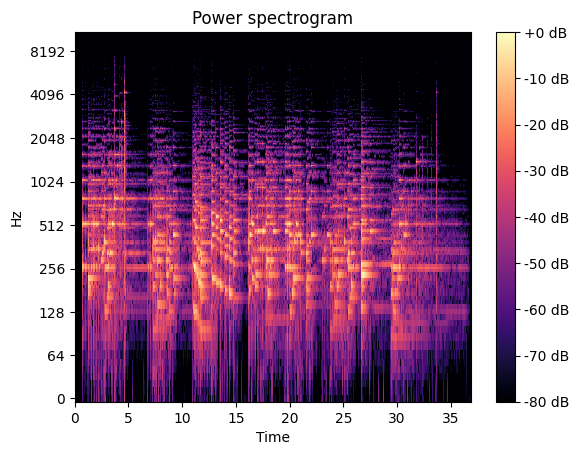

In [3]:
n_fft = 2048
spec = np.abs(librosa.stft(audio_signal))

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(spec,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB");

Above, we have shown a spectrogram but note the fact that we converted the amplitude to dB and our frequency axis is logarithmic. Using dB makes the frequency components more pronounced and a logarithmic axis helps us simulate human perception which is logarithmic

### Notes about the STFT

- If you look at the equations for the physical time and frequency of the STFT, you see that increasing the window length N leads to a better frequency resolution. But if H is N/2, then the hop length increases which worsens the time resolution. This means the STFT leads to a tradeoff between time and frequency.
  
- The window function typically used is called a hann window (some sort of cosine function). Using a rectangular window (one with a constant value) introduces artifacts into the spectrum due to discontinuities at the edges.

### The Mel Scale

A mel spectrogram is a spectrogram with the frequencies converted to the mel scale. The mel scale is based on studies that show that humans do not perceive frequencies on a linear scale. In essence, we can hear the difference in lower frequencies much more easily than higher ones. For example, we can hear the difference between 800Hz and 1000Hz more easily than 16KHz and 18KHz even though they are the same frequency distance. In the mel scale, equal distances of pitch are perceived as the same to a listener. Below is the mel scale frequency curve.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/20/Mel-Hz-plot.png?20060307072142" alt="Mel-Hz Frequency Scale">

### The Mel Spectrogram Visualization

Let's go ahead to visualize the mel spectrogram of my "beautiful" piano rendition of "If you are happy and you know it..."!

In [4]:
spec = librosa.feature.melspectrogram(y=audio_signal, sr=sample_rate, n_fft =2048, hop_length=1024)
spec = librosa.power_to_db(spec, ref=np.max) # convert amplitudes to dB

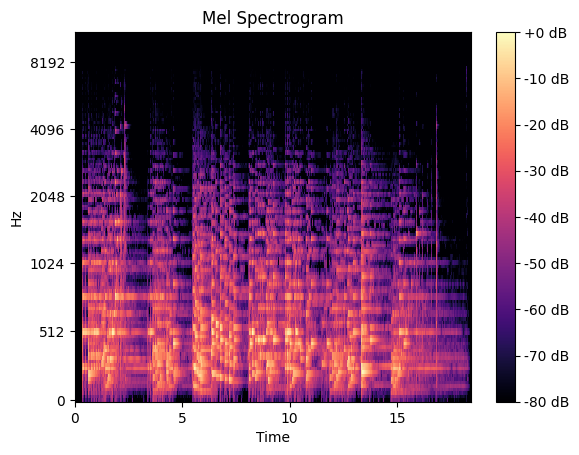

In [5]:
librosa.display.specshow(spec, x_axis='time', y_axis='mel');
plt.title("Mel Spectrogram");
plt.colorbar(format='%+2.0f dB');

## Constant Q Spectral Transform

We are not going to mention much here since the basis of the constant Q spectral transform is something we have covered previously.<br>

Remember that for the discrete fourier transform (also applies to the STFT), we designated the frequency, $\omega = \frac{k}{N}$ where k is more or less a frequency bin and $N$ is the number of samples being considered for the transform. As I mentioned earlier, this equation breaks down the frequency space lineary. But as we saw with the mel spectrogram above, <b><i>humans do not perceive frequencies linearly!</i></b> The Constant Q Spectral transform is an attempt to solve this problem.

Recall that $\omega$ corresponds to a physical frequency of $\frac{\omega}{T} = \omega \cdot F_{s}$. This means:

$$
    F_{coeff} = \omega \cdot F_{s} = \frac{kF_{s}}{N}
$$

Note that k has another name called $Q$ aka the quality factor. There is a reason for this but let's avoid going down this rabbit hole. Just take it that in the case of the DFT or STFT, $k$ is the quality factor.
<br>

We also mentioned ealrier that the frequency bandwith or resolution (let's designate it as $F_{band}$) can be expressed as:

$$
    {F_{band} = \frac{F_{s}}{N}}
$$

Note that increasing $F_{band}$ corresponds to reducing the frequency resolution and decreasing $F_{band}$ corresponds to increasing the frequency resolution. Why? If $F_{band}$ increases, it means N is smaller and this means, $\omega = \frac{k}{N}$ is larger, implying larger frequency bins and coarser frequency resolution.

---

If we make $N$ the subject of the formula from above, we obtain:

$$
    {N = \frac{F_{s}}{F_{band}}}
$$

What does this mean? Looking at the equation, we see that $F_{band}$ is a constant. If it were not constant, $N$ can never be a constant, but we know in the standard STFT or DFT, the window size is constant. Since we know that humans perceive differences in lower frequencies way better than in higher frequencies, it would make sense to increase the frequency resolution for higher frequencies, right? Using the above equation as a guide, if we do that, what happens to $N$? Viola! $N$ increases so that $F_{band}$ becomes smaller, thereby increasing the frequency resolution.

This is the entire concept behind the Constant Q Spectral transform. We allow N vary such that it is small for lower frequencies but high for higher frequencies, hence, factoring the way humans perceive sound!

---

So, let's make $N$ varyyyyy!

$$
N = \frac{F_{s}}{F_{band}}
$$

But we can express $F_{band}$ as a function of $k$ using previous equations. This gives us:

$$
    {F_{band} = \frac{F_{coeff}}{k}}
$$

Hence, we have:

$$
    {N = \frac{kF_{s}}{F_{coeff}} = (\frac{F_{s}}{F_{coeff}})Q}
$$

where Q, the quality factor is k! Now how do we make N vary? Simple, let's make Q a constant. By doing so, as $F_{coeff}$ increases, N increases. And if it reduces, N reduces. This is the effect we want!

Finally, we have:

$$
    {N[k] = (\frac{F_{s}}{F_{coeff}})Q}
$$

Now this implies that for the DFT, Q is k (it varies so that N can be constant). However, if we make Q a constant, our window size now varies with frequency. 

### Caculating the Variation in Window Length

To make our equations consistent, let's represent $F_{coeff}$ as $F_{k}$, since it is pretty much the same thing. Doing this, we have:

$$
    {N[k] = (\frac{F_{s}}{F_{k}})Q}
$$

Awesomeeee! Moving on, calculating $N[k]$ is simple. We start off by defining $F_{k}$. Assuming quarter-tone resolution (dividing an octave into 24 equal parts or frequency bins), we have:

$$
    {F_{k} = (2^{1/24})^{k}f_{min}}
$$

Looking at two frequencies next to each other, we can see that $F_{band} = (2^{1/24})f_{min} - f_{min} = 0.029f_{min}$ (this is for k = 0). Hence, $Q = \frac{f_{min}}{0.029f_{min}} = 34$. Based on this, we can calculate $N[k]$ which should increase as our frequency increases and vice-versa!

### Constant Q Spectral Transform

Now, we are going to rewrite the STFT based on everything we have learnt. However, we are going to get rid of the time frame, m to simply things. In other words, we are looking at the DFT process for a given frame m, be it 0, 1, 2 instead of considering the variation in m. Doing that, the constant Q spectral transform can be expressed as:

$$
    X(k) = \frac{1}{N[k]} \cdot \overset{N[k]-1}{\underset{n = 0}{\sum}} x(n) w(k,n) exp(-2\pi iQn/N[k])
$$

The difference from the above is the division by $N[K]$. We do this because the window length varies with the frequency bin. Hence, we have to normalize our results to ensure consistency. And boom! We are done with chapter 1. But before we round up, let's visualize our CQT (Constant Q spectral transform) spectrogram.

### Visualizing the CQT Spectrogram

Before, we visualize the CQT, to know more about the theory, you can check out [this paper](http://academics.wellesley.edu/Physics/brown/pubs/cq1stPaper.pdf) which covers it in great detail.

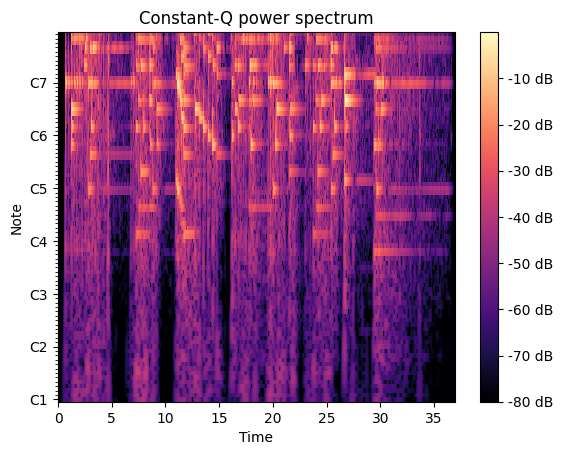

In [6]:
cqt = np.abs(librosa.cqt(y=audio_signal, sr=sample_rate, bins_per_octave=24))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(cqt, ref=np.max),
                               sr=sample_rate, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB");